In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import datetime, date
import pandas_datareader.data as web


In [8]:
# Select ticker for largest company
nyse = pd.read_excel('data/listings.xlsx', sheetname='nyse', na_values='n/a')
nyse = nyse.sort_values('Market Capitalization', ascending=False)
print(nyse[['Stock Symbol', 'Company Name']].head(3))

C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


     Stock Symbol             Company Name
1586          JNJ        Johnson & Johnson
1125          XOM  Exxon Mobil Corporation
1548          JPM    J P Morgan Chase & Co


In [9]:
largest_by_market_cap = nyse.iloc[0] # 1st row iloc is used for integer indexing

print(largest_by_market_cap['Stock Symbol'])

JNJ


In [10]:
# another way to get ticker for largest company 
# set stock ticker as index
nyse = nyse.set_index('Stock Symbol')
print(nyse.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3147 entries, JNJ to EAE
Data columns (total 6 columns):
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(3)
memory usage: 172.1+ KB
None


In [11]:
print(nyse['Market Capitalization'].idxmax()) # index of maximum value of market capitalization

JNJ


In [13]:
# Get ticker for largest tech company
nyse['Sector'].unique() # unique values as numpy array

array(['Health Care', 'Energy', 'Finance', 'Miscellaneous',
       'Public Utilities', 'Basic Industries', 'Consumer Services',
       'Consumer Non-Durables', 'Technology', 'Capital Goods',
       'Transportation', 'Consumer Durables', nan], dtype=object)

In [15]:

tech = nyse.loc[nyse.Sector=='Technology']

tech.head(2)

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
ORCL,Oracle Corporation,44.00,1.810461e+11,1986.0,Technology,Computer Software: Prepackaged Software
TSM,Taiwan Semiconductor Manufacturing Company Ltd.,31.83,1.650704e+11,1997.0,Technology,Semiconductors


In [16]:
# using idxmax()
nyse.loc[nyse.Sector=='Technology','Market Capitalization'].idxmax()

'ORCL'

In [18]:
nyse.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
JNJ,Johnson & Johnson,124.99,3.388344e+11,NaN,Health Care,Major Pharmaceuticals
XOM,Exxon Mobil Corporation,81.69,3.387287e+11,NaN,Energy,Integrated oil Companies
JPM,J P Morgan Chase & Co,84.40,3.002833e+11,NaN,Finance,Major Banks
BABA,Alibaba Group Holding Limited,110.21,2.755250e+11,2014.0,Miscellaneous,Business Services
GE,General Electric Company,29.56,2.574296e+11,NaN,Energy,Consumer Electronics/Appliances


In [27]:
# Get data for largest tech company with 2017 IPO
ticker = nyse.loc[(nyse.Sector=='Technology') & (nyse['IPO Year']==2017), 'Market Capitalization'].idxmax()
# data = DataReader(ticker, 'fred') #, date(2010,1,1)) # start:2010/1/1
# data = data.loc[:,['Close','Volume']]
print(ticker)

SNAP


In [30]:
data = web.get_data_yahoo(ticker, start=datetime(2010,1,1))
data = data.loc[:,['Close','Volume']]

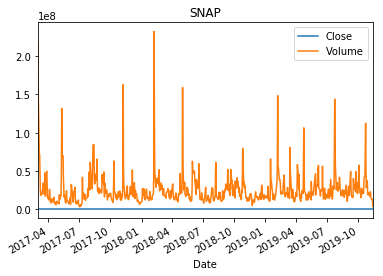

In [31]:
# Visualize price & volume on the two axes
# to plot two columns that are measured with different scales on the same chart we can use the secondary_y parameter & select the column on right axis with different scale
data.plot(title=ticker, secondary_y='volume')


In [38]:
# tight_layout : improves layout by reducing whitespaces
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>